In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
R={}
R[0]=-1
R[20]=0
for i in range(1,20):
    R[i]=0

In [3]:
n=[1,2,4,8,16]
alpha=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=1
true_V=[-1+i/20 for i in range(20)]
x=[str(index) for index in alpha]
all_error=[[0 for i in range(len(alpha))] for j in range(len(n))]
iterations=100
episodes=10

In [4]:
def calc_error(V):
    ans=0
    for i in range(1,20):
        ans+=(V[i]-true_V[i])**2
    return math.sqrt(ans/19)

In [5]:
def episode(n,alpha,V):
    start=10
    T=1000000
    t=0
    reward=[0]
    state=[10]
    end=False
    while True:
        if not end:
            c=random.choice([-1,1])
            s=start+c
            state.append(s)
            r=R[s]
            reward.append(r)
            if s==0 or s==20:
                T=t+1
                end=True
        tao=t-n+1
        #print(reward)
        #print(s)
        if tao>=0:
            #print(t,tao)
            G=0
            for i in range(tao+1,min(tao+n,T)+1):
                G+=pow(gamma,i-tao-1)*reward[i]
            if tao+n <T:
                #print(i)
                G=G+pow(gamma,n)*V[state[tao+n]]
            #print(G)
            V[state[tao]]=V[state[tao]]+alpha*(G-V[state[tao]])
        start=s
        t+=1
        if tao==T-1:
            #print(state)
            #print(reward)
            return V

In [6]:
for it in range(iterations):
    for i in range(len(n)):
        for j in range(len(alpha)):
            tmp_n=n[i]
            tmp_alpha=alpha[j]
            V={}
            for k in range(1,20):
                V[k]=0
            for epi in range(episodes):
                V=episode(tmp_n,tmp_alpha,V)
            all_error[i][j]+=calc_error(V)
for i in range(len(n)):
    for j in range(len(alpha)):
        all_error[i][j]/=iterations

Text(0, 0.5, 'RMSE')

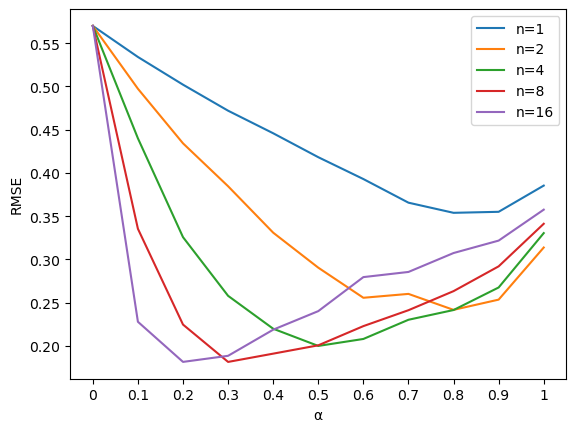

In [7]:
for i in range(len(n)):
    plt.plot(x,all_error[i],label="n="+str(n[i]))
plt.legend()
plt.xlabel("α")
plt.ylabel("RMSE")